In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [5]:
def Function(x):
    T = np.array((-3,2))
    R = np.array((2,-2))
    n0 = 1.
    n1 = 1.33
    
    return (n0*(np.sqrt((x-(T[0]))**2 + T[1]**2) +  n1*(np.sqrt((x-(R[0]))**2 + R[1]**2))))

In [10]:
b = np.linspace(-3,2,100)
y = Function(b)

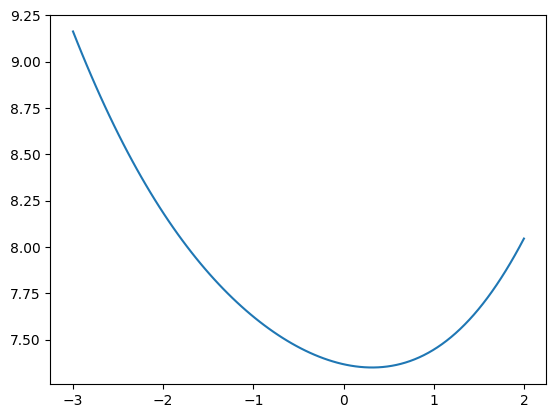

In [11]:
plt.plot(b,y)

De forma aproximada la raiz debe estar en aprocimadamente 0.3

In [12]:
def Derivative(f,x,h=1e-5):
    return (f(x+h)-f(x-h))/(2*h)

In [41]:
def SecDerivative(f,x,h=1e-5):
    return (f(x+h)+f(x-h)-2*f(x))/h**2

In [45]:
def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-6):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            punto = Derivative(Function,xn)
            xn1 = xn - punto/df(f,xn)
            
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn

In [46]:
Derivative
x = GetNewtonRaphson(Function,SecDerivative,0)
print(x)

0.31690575640285973


In [101]:
def GetAngle(v1,v2):
    a = (v1[0]*v2[0]+v1[1]*v2[1])/np.sqrt(v1[0]**2+v1[1]**2)*np.sqrt(v2[0]**2+v2[1]**2)
    Angle = np.arccos(a)
    angle = Angle
    return angle

In [102]:
T = np.array((-3,2))
R = np.array((2,-2))
v1 = np.array((-3+x,2))
v2 = np.array((0,1))
v3 = np.array((2-x,-2))
v4 = np.array((0,-1))

Angle0 = GetAngle(v1,v2)
Angle1 = GetAngle(v3,v4)
print(Angle0)
print(Angle1)

0.9302405609350641
0.6995662174530131


In [103]:
n0 = 1.
n1 = 1.33

a = n0/n1  
b = np.sin(Angle1*np.pi/180)/np.sin(Angle0*np.pi/180)
print(a)
print(b)

0.7518796992481203
0.7520415683863069


Se puede ver que la ley de Snell se cumple de forma aproximada y el error se asocia con los calculos de las derivadas y el calculo de las raices mediante Newton Raphson. 